In [ ]:
# This is Luke's scratchpad notebook.

In [ ]:
# Importing the libraries:
import pandas as pd
import numpy as np
import math
from scipy import stats

# visualizing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# plt.rc('figure', figsize=(13, 10))
# plt.rc('font', size=14)

# preparing
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# modeling and evaluating
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix


# turn off warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import seaborn as sns

from scripts_python import wrangle
from scripts_python import explore
from scripts_python import model_MAE, model_classification

import matplotlib.pyplot as plt
import numpy as np


# from sklearn.metrics import mean_squared_error
# from sklearn.linear_model import LinearRegression
# from statsmodels.formula.api import ols
# from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
# from sklearn.feature_selection import f_regression, SelectKBest, RFE 
# from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
# from sklearn.preprocessing import PolynomialFeatures

# # Classfication Modeling:
# from sklearn.linear_model import LogisticRegression, LinearRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
# import model_classification

from math import sqrt
from scipy import stats

ModuleNotFoundError: No module named 'scripts_python'

In [5]:
import sys
import os


# Script imports
from sv_capstone/scripts_python import wrangle
from scripts_python import explore
from scripts_python import model_MAE, model_classification


# # acquiring
# from pydataset import data

SyntaxError: invalid syntax (<ipython-input-5-c00187c2a94f>, line 6)

In [2]:
# SVI doesn't have zip codes, it has fips. So I need to transform FIPS into zip codes, and *then* I can join on the Covid cases onto the data frame

#### Key datasource:
https://www.huduser.gov/portal/datasets/usps_crosswalk.html
Possible note for presentation comments:
- we downloaded the 4th quarter 2018 data Tact-to-zip file, which is the file from HUD that'll translate the data

### Data Prep

In [3]:
import acquire
import prepare

In [4]:
import wrangle

In [5]:
df = acquire.run()

Acquire: compiling raw data files...
Acquire: Completed!


In [6]:
df.head()

,st,state,st_abbr,stcnty,county,tract,location,area_sqmi,e_totpop,m_totpop,...,e_uninsur,m_uninsur,ep_uninsur,mp_uninsur,e_daypop,zip,address_ratio,population,positive,casesp100000
0,48,TEXAS,TX,48029,Bexar,48029110100,"Census Tract 1101, Bexar County, Texas",1.364296,3102,365,...,272,130,11.3,5.0,38328,78205,0.52,1633,63,3857.930190
1,48,TEXAS,TX,48029,Bexar,48029110300,"Census Tract 1103, Bexar County, Texas",0.598444,3023,309,...,606,206,20.0,5.7,9202,78210,0.79,39242,1583,4033.943224
2,48,TEXAS,TX,48029,Bexar,48029110500,"Census Tract 1105, Bexar County, Texas",0.448810,2388,243,...,465,125,19.5,4.4,2044,78207,1.00,58019,3205,5524.052466
3,48,TEXAS,TX,48029,Bexar,48029110600,"Census Tract 1106, Bexar County, Texas",0.758136,5301,486,...,690,265,24.5,7.4,6776,78207,1.00,58019,3205,5524.052466
4,48,TEXAS,TX,48029,Bexar,48029110700,"Census Tract 1107, Bexar County, Texas",0.379005,1114,208,...,251,128,22.5,8.8,3716,78212,0.92,29916,966,3229.041316


In [7]:
df = prepare.prepare_data(df)

In [8]:
df.head()

,tract,raw_svi,f_pov_soci,f_unemp_soci,f_pci_soci,f_nohsdp_soci,f_soci_total,f_age65_comp,f_age17_comp,f_disabl_comp,...,f_mobile_trans,f_crowd_trans,f_noveh_trans,f_groupq_trans,f_trans_total,all_flags_total,zip,tract_cases_per_100k,bin_svi,rank_svi
0,48029110100,0.6503,0,0,0,0,0,0,0,0,...,0,0,1,1,3,3,78205,2006.123699,mod_high,2
1,48029110300,0.6978,1,1,0,0,2,0,0,0,...,0,0,1,0,2,4,78210,3186.815147,mod_high,2
2,48029110500,0.9770,1,1,1,1,4,0,1,1,...,0,0,1,0,1,9,78207,5524.052466,high,1
3,48029110600,0.9841,1,1,1,1,4,0,0,1,...,0,0,1,1,3,8,78207,5524.052466,high,1
4,48029110700,0.9378,0,0,1,0,1,1,0,0,...,0,0,1,0,1,3,78212,2970.718011,high,1


# Moving into Explore

- Where are the clusters of cases visually?
- Where are the most dense clusters?
- How to define dense vs not dense?
- What are some other visually interesting things?
    - Scatterplot of all cases?
    - mapplot of svi by census tract?

In [9]:
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_data()

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(289, 25) (73, 25)


In [10]:
train_exp.head()

,tract,raw_svi,f_pov_soci,f_unemp_soci,f_pci_soci,f_nohsdp_soci,f_soci_total,f_age65_comp,f_age17_comp,f_disabl_comp,...,f_mobile_trans,f_crowd_trans,f_noveh_trans,f_groupq_trans,f_trans_total,all_flags_total,zip,tract_cases_per_100k,bin_svi,rank_svi
289,48029181821,0.4879,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,78240,2771.002224,low_mod,3
200,48029171902,0.6394,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,78245,2924.011251,mod_high,2
69,48029130200,0.6523,0,0,0,0,0,0,0,0,...,0,0,1,0,1,2,78203,4177.649457,mod_high,2
29,48029121120,0.0872,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,78247,2222.089837,low,4
12,48029120502,0.9531,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,78218,3235.404493,high,1


In [11]:
train_exp.columns.tolist()

['tract',
 'raw_svi',
 'f_pov_soci',
 'f_unemp_soci',
 'f_pci_soci',
 'f_nohsdp_soci',
 'f_soci_total',
 'f_age65_comp',
 'f_age17_comp',
 'f_disabl_comp',
 'f_sngpnt_comp',
 'f_comp_total',
 'f_minrty_status',
 'f_limeng_status',
 'f_status_total',
 'f_munit_trans',
 'f_mobile_trans',
 'f_crowd_trans',
 'f_noveh_trans',
 'f_groupq_trans',
 'f_trans_total',
 'all_flags_total',
 'zip',
 'tract_cases_per_100k',
 'bin_svi',
 'rank_svi']

In [12]:
# do a bin of how many flags == 1 per tract

In [13]:
# Get ideas from zillow project, linear regression explore lesson, 

In [14]:
x_box = train_exp.raw_svi
y_box = train_exp.tract_cases_per_100k

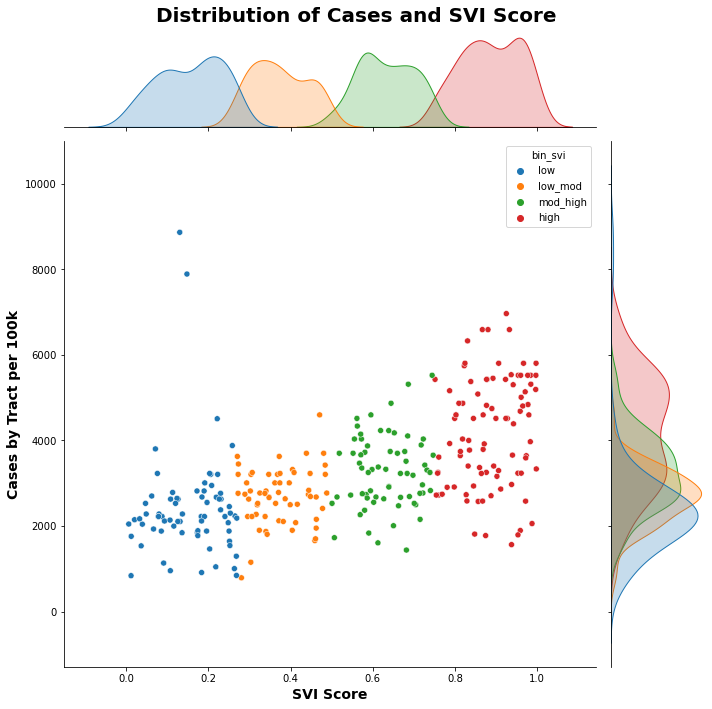

In [15]:
ax = sns.jointplot(x = "raw_svi", y = "tract_cases_per_100k", data = train_exp, hue = "bin_svi", height = 10)
ax.ax_joint.set_xlabel('SVI Score', fontweight='bold', fontsize = 14)
ax.ax_joint.set_ylabel('Cases by Tract per 100k', fontweight='bold', fontsize = 14)
ax.fig.suptitle("Distribution of Cases and SVI Score", fontweight='bold', fontsize = 20)
# ax.legend(loc = 'upper left') Can't get this legend command to work.

ax.fig.tight_layout()

plt.show()

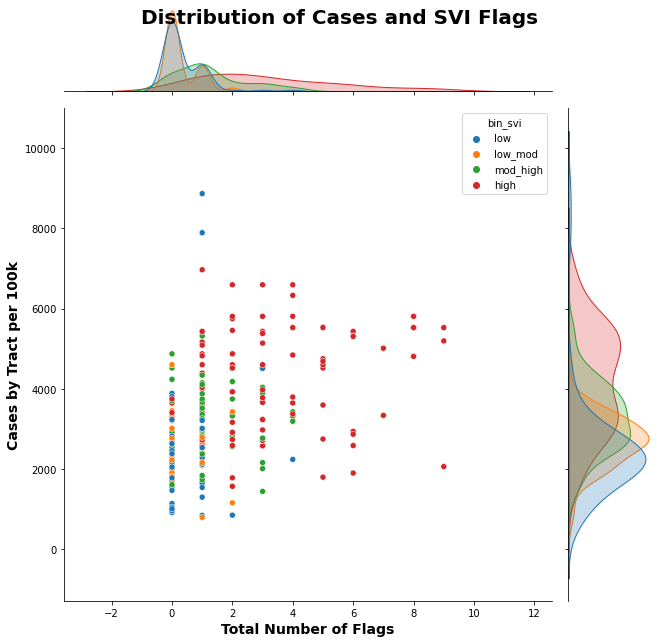

In [16]:
ax2 = sns.jointplot(x = "all_flags_total", y = "tract_cases_per_100k", data = train_exp, hue = "bin_svi", height = 9)
ax2.ax_joint.set_xlabel('Total Number of Flags', fontweight='bold', fontsize = 14)
ax2.ax_joint.set_ylabel('Cases by Tract per 100k', fontweight='bold', fontsize = 14)
ax2.fig.suptitle("Distribution of Cases and SVI Flags", fontweight='bold', fontsize = 20)

ax.fig.tight_layout()
plt.show()

In [17]:
subtotal_flag_list = ['f_soci_total', 'f_comp_total', 'f_status_total', 'f_trans_total']

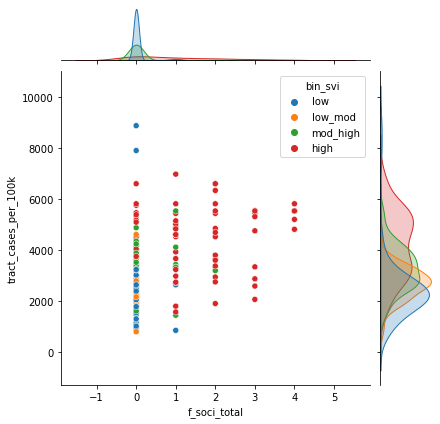

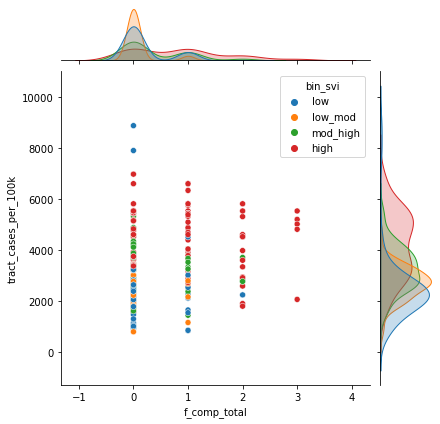

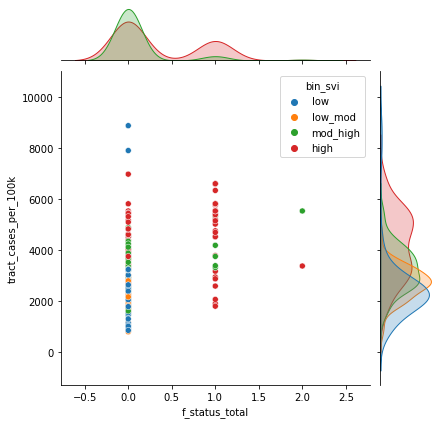

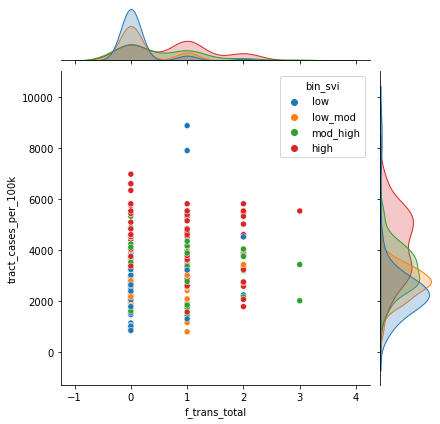

In [18]:
for col in subtotal_flag_list:
    sns.jointplot(x = col, y = "tract_cases_per_100k", data = train_exp, hue = "bin_svi")

In [19]:
# raw_svi, tract_cases, and total_all_flags 

<AxesSubplot:ylabel='Frequency'>

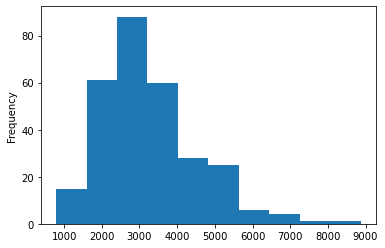

In [20]:
train_exp.tract_cases_per_100k.plot(kind = 'hist')

In [21]:
tract100k = train_exp.tract_cases_per_100k

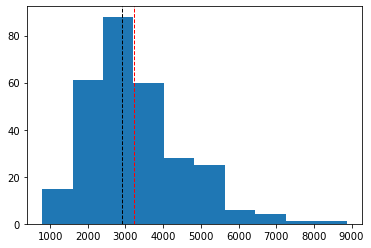

In [23]:
result = plt.hist(tract100k, bins = 10)
plt.axvline(tract100k.median(), color = 'k', linestyle = 'dashed', linewidth = 1)
plt.axvline(tract100k.mean(), color = 'red', linestyle = 'dashed', linewidth = 1)
plt.show()

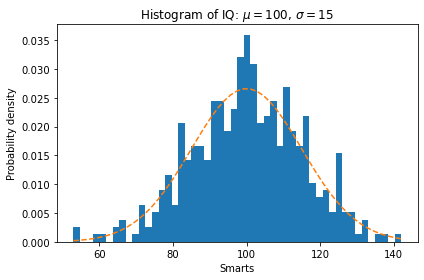

In [24]:
np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [25]:
data_test = tract100k.copy()

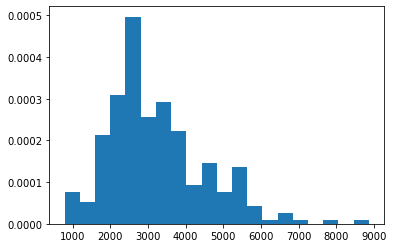

In [26]:
_, bins, _ = plt.hist(data_test, 20, density = 1)

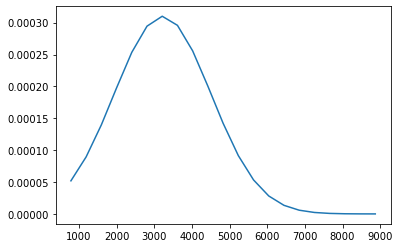

In [27]:
mu, sigma = stats.norm.fit(data_test)
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)

In [28]:
# Need to figure this out more... looking through the documentation, but putting a best fit line down as a nice to have.

In [33]:
tract100k = train_exp.tract_cases_per_100k


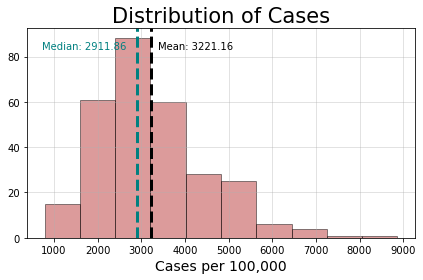

In [38]:
# Creating the histograms

# Tract cases per 100k:
# plt.subplot(311)
plt.hist(x = tract100k, bins = 10, color = 'firebrick', edgecolor='k', alpha=0.45)
plt.title('Distribution of Cases', fontsize = 21)
plt.xlabel('Cases per 100,000', fontsize = 14)
plt.ylabel('', fontsize = 18)

plt.axvline(tract100k.mean(), color = 'k', linestyle='dashed', linewidth=3)
min_ylim_v, max_ylim_v = plt.ylim()
plt.text(tract100k.mean()*1.05, max_ylim_v*0.9, 'Mean: {:.2f}'.format(tract100k.mean()))
plt.axvline(tract100k.median(), color = 'teal', linestyle='dashed', linewidth=3)
plt.text(tract100k.median()*.25, max_ylim_v*0.9, 'Median: {:.2f}'.format(tract100k.median()), c = 'teal')

plt.grid(b = True, alpha = .45)
# plt.figure(figsize = (16, 9))
plt.tight_layout()
plt.show()

## Dallas Vizzes

In [2]:
# bring in classification datasets with new y variable
class_df, class_train_exp, class_X_train_scaled, class_y_train, class_X_test_scaled, class_y_test = wrangle.wrangle_dallas_data_class()

NameError: name 'wrangle' is not defined

<AxesSubplot:ylabel='Frequency'>

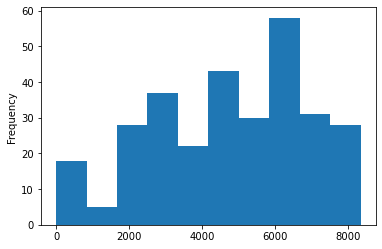

In [5]:
class_df.tract_cases_per_100k.plot(kind = 'hist')

In [1]:
x_axis = class_df.tract_cases_per_100k

plt.figure(figsize = (12, 8))
plt.hist(x_axis, bins = 10, edgecolor = 'black')
plt.title(label = "Tract Cases per 100k", fontsize = 25, fontweight = 'bold')
plt.ylabel("Number of Bins", fontsize = 15, fontstyle = 'italic')
plt.xlabel("Number of Cases", fontsize = 15, fontstyle = 'italic')



plt.show()

NameError: name 'class_df' is not defined

### Cross Validation

In [39]:
# loocv to manually evaluate the performance of a random forest classifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [40]:

# create dataset
X, y = make_blobs(n_samples=100, random_state=1)
# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# fit model
	model = RandomForestClassifier(random_state=1)
	model.fit(X_train, y_train)
	# evaluate model
	yhat = model.predict(X_test)
	# store
	y_true.append(y_test[0])
	y_pred.append(yhat[0])
# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.990


In [41]:
# loocv to automatically evaluate the performance of a random forest classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# create dataset
X, y = make_blobs(n_samples=100, random_state=1)
# create loocv procedure
cv = LeaveOneOut()
# create model
model = RandomForestClassifier(random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.990 (0.099)


In [42]:
# Sonar Example:

# summarize the sonar dataset
from pandas import read_csv
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
sonar_df = read_csv(url, header=None)
# split into input and output elements
data = sonar_df.values
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

(208, 60) (208,)


In [43]:
y

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [44]:
# create loocv procedure
cv = LeaveOneOut()

In [45]:
# create model
model = RandomForestClassifier(random_state=1)

In [46]:
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.822 (0.382)


#### Housing data example:

In [47]:
# loocv evaluate random forest on the housing dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
# split into inputs and outputs
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)
# create loocv procedure
cv = LeaveOneOut()
# create model
model = RandomForestRegressor(random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force positive
scores = absolute(scores)
# report performance
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

(506, 13) (506,)
MAE: 2.182 (2.338)


In [1]:
# MAE updates complete.